# Instalação e Importação dos pacotes

In [ ]:
#Instalação dos Pacotes
#!pip install openpyxl
#!pip install pandas
#!pip install locate
#!pip install numpy
#!pip install -q -U watermark

In [1]:
#Importação dos Pacotes
import pandas as pd
import random
import numpy as np
import math
import locale
import numpy as np
import matplotlib.pyplot as plt
import random
import math

from scipy.special import comb

pd.set_option('display.max_columns', None)

from collections import Counter

# Define o locale para pt_BR
locale.setlocale(locale.LC_ALL, 'pt_BR.utf-8')

'pt_BR.utf-8'

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Sergio Luis Costa" --iversions

Author: Sergio Luis Costa

pandas    : 1.3.4
numpy     : 1.19.5
matplotlib: 3.4.3



## Preparação dos Dados ##

In [14]:
# Le o arquivo Excel e define a primeira coluna como índice
# Baixar arquivo atualizado em https://asloterias.com.br/todos-resultados-lotomania
    # Clicar em "Download de todos os resultados da Lotofacil até hoje" e 
    # Depois clicar em "Download Todos resultados da Lotofacil em Excel por ordem de sorteio"# Apagar as primeiras 6 linhas no excel e depois importar
df = pd.read_excel('LotoMania23_05_23.xlsx', index_col=0)

In [15]:
df.iloc[:, 1:21] = df.iloc[:, 1:21].apply(lambda x: pd.Series(sorted(x)), axis=1, result_type='broadcast')

In [16]:
df.head(1)

,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15,bola 16,bola 17,bola 18,bola 19,bola 20
Concurso,,,,,,,,,,,,,,,,,,,,,
2471,22/05/2023,0,3,5,14,25,26,35,37,38,39,51,65,69,73,75,77,79,84,90,98


## Contagem de repetição de números em cada coluna (Bola) - Todos os jogos ##

In [17]:
# Seleciona apenas as colunas que varão parte da contagem
colunas = df.iloc[:, 1:21]

In [18]:
#Conta a quantidade de vezes que um número de repete em cada coluna
#counts = colunas.apply(pd.Series.value_counts)
#counts = counts.fillna('')
counts = colunas.apply(pd.Series.value_counts).fillna('')
counts = counts.reset_index(drop=True)
counts.index = counts.index

In [19]:
counts

,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15,bola 16,bola 17,bola 18,bola 19,bola 20
0,492.0,,,,,,,,,,,,,,,,,,,
1,394.0,103.0,,,,,,,,,,,,,,,,,,
2,332.0,140.0,16.0,,,,,,,,,,,,,,,,,
3,274.0,172.0,49.0,2.0,,,,,,,,,,,,,,,,
4,200.0,233.0,63.0,16.0,1.0,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,,,,,,,,,,,,,,,,,6.0,71.0,222.0,198.0
96,,,,,,,,,,,,,,,,,2.0,30.0,161.0,244.0
97,,,,,,,,,,,,,,,,,,19.0,144.0,315.0
98,,,,,,,,,,,,,,,,,,,92.0,374.0


In [20]:
# Criando o dataframe vazio com as colunas de bolas e percentuais
result_columns = []
for i in range(1,21):
    result_columns.extend([f'bola {i}', f'% {i}'])
result = pd.DataFrame(columns=result_columns)

# Calculando a contagem e a porcentagem de cada valor em cada coluna
for i in range(1,21):
    column = f'bola {i}'
    counts = df[column].value_counts().sort_index()
#    counts.index = counts.index + 1 # adiciona 1 ao index
    percentages = counts / len(df[column]) * 100
    percentages = percentages.round(2).astype(str) + ' %'
    values = pd.concat([counts, percentages], axis=1)
    values.columns = [f'bola {i}', f'% {i}']
    result = pd.concat([result, values], axis=1, ignore_index=True)

# Substituindo valores NaN por ''
result = result.fillna('')

# Apaga colunas 0 a 39
result = result.iloc[:, 40:]#reset_index(drop=True)

#Renomeia as colunas
result = result.rename(columns={
    40: 'Bola 1', 41: '% Bola 1', 42: 'Bola 2', 43: '% Bola 2', 44: 'Bola 3', 45: '% Bola 3', 46: 'Bola 4', 47: '% Bola 4',
    48: 'Bola 5', 49: '% Bola 5', 50: 'Bola 6', 51: '% Bola 6', 52: 'Bola 7', 53: '% Bola 7', 54: 'Bola 8', 55: '% Bola 8',
    56: 'Bola 9', 57: '% Bola 9', 58: 'Bola 10', 59: '% Bola 10', 60: 'Bola 11', 61: '% Bola 11', 62: 'Bola 12', 63: '% Bola 12',
    64: 'Bola 13', 65: '% Bola 13', 66: 'Bola 14', 67: '% Bola 14', 68: 'Bola 15', 69: '% Bola 15', 70: 'Bola 16', 71: '% Bola 16',
    72: 'Bola 17', 73: '% Bola 17', 74: 'Bola 18', 75: '% Bola 18', 76: 'Bola 19', 77: '% Bola 19', 78: 'Bola 20', 79: '% Bola 20'
})#.rename(index=lambda x: x+1)

In [21]:
result

,Bola 1,% Bola 1,Bola 2,% Bola 2,Bola 3,% Bola 3,Bola 4,% Bola 4,Bola 5,% Bola 5,Bola 6,% Bola 6,Bola 7,% Bola 7,Bola 8,% Bola 8,Bola 9,% Bola 9,Bola 10,% Bola 10,Bola 11,% Bola 11,Bola 12,% Bola 12,Bola 13,% Bola 13,Bola 14,% Bola 14,Bola 15,% Bola 15,Bola 16,% Bola 16,Bola 17,% Bola 17,Bola 18,% Bola 18,Bola 19,% Bola 19,Bola 20,% Bola 20
0,492.0,19.91 %,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,394.0,15.94 %,103.0,4.17 %,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,332.0,13.44 %,140.0,5.67 %,16.0,0.65 %,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,274.0,11.09 %,172.0,6.96 %,49.0,1.98 %,2.0,0.08 %,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,200.0,8.09 %,233.0,9.43 %,63.0,2.55 %,16.0,0.65 %,1.0,0.04 %,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,6.0,0.24 %,71.0,2.87 %,222.0,8.98 %,198.0,8.01 %
96,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2.0,0.08 %,30.0,1.21 %,161.0,6.52 %,244.0,9.87 %
97,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,19.0,0.77 %,144.0,5.83 %,315.0,12.75 %
98,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,92.0,3.72 %,374.0,15.14 %


In [22]:
# Grava em arquivo o resultado de result
#result.to_excel('LotoMania_Analise.xlsx', index=True)

## Contagem de repetição de números em cada coluna (Bola) - Últimos 15 Jogos ##

In [23]:
# Identifica o último jogo realizado em df3
ultimo_jogo = df.index.max()

# Cria um dataframe com os últimos 10 jogos
df_ultimos_15 = df[df.index > ultimo_jogo - 15].iloc[:, :].copy()

# Apaga coluna de data
#df_ultimos_15 = df_ultimos_15.drop('Data', axis=1)


In [24]:
ultimo_jogo

2471

In [25]:
df_ultimos_15.head(15)

,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15,bola 16,bola 17,bola 18,bola 19,bola 20
Concurso,,,,,,,,,,,,,,,,,,,,,
2471,22/05/2023,0,3,5,14,25,26,35,37,38,39,51,65,69,73,75,77,79,84,90,98
2470,19/05/2023,0,4,6,14,23,25,33,37,42,49,53,56,60,61,62,69,84,91,96,97
2469,17/05/2023,7,10,11,15,23,29,31,35,36,47,60,61,65,68,70,86,92,93,97,99
2468,15/05/2023,1,4,6,14,15,20,32,40,43,45,54,57,67,74,75,81,92,93,94,99
2467,12/05/2023,6,7,9,10,13,14,18,20,22,23,25,32,34,41,44,50,56,65,71,84
2466,10/05/2023,3,5,13,21,24,28,30,32,35,36,42,55,61,62,70,73,83,86,91,94
2465,08/05/2023,7,13,28,29,30,34,35,40,43,59,63,64,75,76,80,81,85,87,93,99
2464,05/05/2023,8,10,11,16,17,18,24,26,29,41,45,51,54,59,70,80,87,94,96,97
2463,03/05/2023,1,3,4,5,8,9,18,19,24,30,31,58,60,67,70,75,77,79,86,90


In [26]:
# Criando o dataframe vazio com as colunas de bolas e percentuais
result_columns_15 = []
for i in range(1, 21):
    result_columns_15.extend([f'bola {i}', f'% {i}'])
result_ultimos_15 = pd.DataFrame(columns=result_columns_15)

# Calculando a contagem e a porcentagem de cada valor em cada coluna
for i in range(1, 21):
    column = f'bola {i}'
    counts = df_ultimos_15[column].value_counts().sort_index()
    percentages = counts / len(df_ultimos_15[column]) * 100
    percentages = percentages.round(2).astype(str) + ' %'
    values = pd.concat([counts, percentages], axis=1)
    values.columns = [f'bola {i}', f'% {i}']
    result_ultimos_15 = pd.concat([result_ultimos_15, values], axis=1, ignore_index=True)

# Substituindo valores NaN por ''
result_ultimos_15 = result_ultimos_15.fillna('')

# Apaga colunas 0 a 29
result_ultimos_15 = result_ultimos_15.iloc[:, 40:].reset_index(drop=True)
#result = result.iloc[:, 40:].reset_index(drop=True)

#Renomeia as colunas
result_ultimos_15 = result_ultimos_15.rename(columns={
    40: 'Bola 1', 41: '% Bola 1', 42: 'Bola 2', 43: '% Bola 2', 44: 'Bola 3', 45: '% Bola 3', 46: 'Bola 4', 47: '% Bola 4',
    48: 'Bola 5', 49: '% Bola 5', 50: 'Bola 6', 51: '% Bola 6', 52: 'Bola 7', 53: '% Bola 7', 54: 'Bola 8', 55: '% Bola 8',
    56: 'Bola 9', 57: '% Bola 9', 58: 'Bola 10', 59: '% Bola 10', 60: 'Bola 11', 61: '% Bola 11', 62: 'Bola 12', 63: '% Bola 12',
    64: 'Bola 13', 65: '% Bola 13', 66: 'Bola 14', 67: '% Bola 14', 68: 'Bola 15', 69: '% Bola 15', 70: 'Bola 16', 71: '% Bola 16',
    72: 'Bola 17', 73: '% Bola 17', 74: 'Bola 18', 75: '% Bola 18', 76: 'Bola 19', 77: '% Bola 19', 78: 'Bola 20', 79: '% Bola 20'
})

In [29]:
result_ultimos_15

,Bola 1,% Bola 1,Bola 2,% Bola 2,Bola 3,% Bola 3,Bola 4,% Bola 4,Bola 5,% Bola 5,Bola 6,% Bola 6,Bola 7,% Bola 7,Bola 8,% Bola 8,Bola 9,% Bola 9,Bola 10,% Bola 10,Bola 11,% Bola 11,Bola 12,% Bola 12,Bola 13,% Bola 13,Bola 14,% Bola 14,Bola 15,% Bola 15,Bola 16,% Bola 16,Bola 17,% Bola 17,Bola 18,% Bola 18,Bola 19,% Bola 19,Bola 20,% Bola 20
0,3.0,20.0 %,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3.0,20.0 %,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,2.0,13.33 %,2.0,13.33 %,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,1.0,6.67 %,2.0,13.33 %,1.0,6.67 %,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,,,3.0,20.0 %,1.0,6.67 %,1.0,6.67 %,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1.0,6.67 %,1.0,6.67 %
92,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,3.0,20.0 %,,
93,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1.0,6.67 %,3.0,20.0 %
94,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,2.0,13.33 %


In [30]:
# Grava em arquivo o resultado de result_ultimos_15
#result_ultimos_15.to_excel('LotoMania_Analise_Ultimos15.xlsx', index=True)

## Análise de frequência de números pares e ímpares - Todos os jogos ##

In [31]:
# Função que conta o número de pares e ímpares em uma linha do DataFrame
def count_parity(row):
    pares = 0
    impares = 0
    for i in range(1,21):
        num = row[i]
        if num % 2 == 0:
            pares += 1
        else:
            impares += 1
    return pd.Series({'pares': pares, 'impares': impares})

# Aplicando a função a cada linha do DataFrame e criando duas novas colunas
df[['pares', 'impares']] = df.apply(count_parity, axis=1)


In [32]:
df.head(1)

,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15,bola 16,bola 17,bola 18,bola 19,bola 20,pares,impares
Concurso,,,,,,,,,,,,,,,,,,,,,,,
2471,22/05/2023,0,3,5,14,25,26,35,37,38,39,51,65,69,73,75,77,79,84,90,98,7,13


In [33]:
# calcula a quantidade total de números pares e ímpares
total_pares = df['pares'].sum()
total_impares = df['impares'].sum()

# calcula as porcentagens
porcentagem_pares = (total_pares / (total_pares + total_impares)) * 100
porcentagem_impares = (total_impares / (total_pares + total_impares)) * 100

# imprime os resultados
print(f"Na história da LotoMania, sairam {total_pares} números pares e {total_impares} impares.")
print(f"Pares {porcentagem_pares:.2f}%    Ímpares: {porcentagem_impares:.2f}")

Na história da LotoMania, sairam 24628 números pares e 24792 impares.
Pares 49.83%    Ímpares: 50.17


## Análise de frequência de números pares e ímpares - Últimos 15 dias ##

In [34]:
# calcula a quantidade total de números pares e ímpares
#total_pares = df_ultimos_15['pares'].sum()
#total_impares = df_ultimos_15['impares'].sum()
total_pares = df.iloc[0:15, :]['pares'].sum()
total_impares = df.iloc[0:15, :]['impares'].sum()

# calcula as porcentagens
porcentagem_pares = (total_pares / (total_pares + total_impares)) * 100
porcentagem_impares = (total_impares / (total_pares + total_impares)) * 100

# imprime os resultados
print(f"Nos últimos 15 sorteios, sairam {total_pares} números pares e {total_impares} impares.")
print(f"Pares {porcentagem_pares:.2f}%    Ímpares: {porcentagem_impares:.2f}")

Nos últimos 15 sorteios, sairam 143 números pares e 157 impares.
Pares 47.67%    Ímpares: 52.33


## Analisando quantidade de números primos - Todos os jogos ##

In [35]:
#Função que verifica a quantidade de números primos existem na linha. Cria a coluna 
def is_prime(num):
    if num < 2:
        return False
    for i in range(2, int(num**0.5)+1):
        if num % i == 0:
            return False
    return True

#Cria a coluna Quant_Primos com o resultado da função is_prime
df['Quant_Primos'] = df.iloc[:, 1:21].applymap(is_prime).sum(axis=1)

#Função que guarda os números primos contidos na linha.
def get_primes(row):
    primes = []
    for num in row.values:
        if is_prime(num):
            primes.append(num)
    return primes

#Cria a coluna Primos com o resultado da função get_primes 
df['Primos'] = df.iloc[:, 1:21].apply(get_primes, axis=1)

In [36]:
#Faz a contagem de frequência da coluna Primos
counts = df['Quant_Primos'].value_counts()

#Ordena o resultado
counts = counts.sort_values(ascending=False)

#Cria um dataframe com o resultado e reseta o indice
counts_df = counts.to_frame().reset_index()
counts_df.columns = ['Primo', 'Frequência']

print(counts_df)

    Primo  Frequência
0       5         551
1       6         481
2       4         474
3       3         292
4       7         270
5       8         173
6       2         140
7       9          39
8       1          33
9      10          10
10     11           5
11      0           3


In [37]:
# Criando uma lista com a quantidade de números primos em cada linha do dataframe
num_primos = df['Quant_Primos'].tolist()

# Contando quantas vezes apareceram 1, 2, 3, ..., 9 números primos
count_primos = {}
for i in range(1, 12):
    count_primos[i] = num_primos.count(i)

# Criando uma lista com as porcentagens de cada quantidade de números primos
total_jogos = len(df)
porcentagens = [round(count_primos[i]/total_jogos*100, 2) for i in range(1, 12)]

# Imprimindo o resultado em um texto
texto = "Na história dos jogos, apareceram:\n"
for i in range(1, 12):
    texto += f"{count_primos[i]} jogos com {i} números primos, totalizando {porcentagens[i-1]}%.\n"

print(texto)

Na história dos jogos, apareceram:
33 jogos com 1 números primos, totalizando 1.34%.
140 jogos com 2 números primos, totalizando 5.67%.
292 jogos com 3 números primos, totalizando 11.82%.
474 jogos com 4 números primos, totalizando 19.18%.
551 jogos com 5 números primos, totalizando 22.3%.
481 jogos com 6 números primos, totalizando 19.47%.
270 jogos com 7 números primos, totalizando 10.93%.
173 jogos com 8 números primos, totalizando 7.0%.
39 jogos com 9 números primos, totalizando 1.58%.
10 jogos com 10 números primos, totalizando 0.4%.
5 jogos com 11 números primos, totalizando 0.2%.



In [39]:
df.head(1)

,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15,bola 16,bola 17,bola 18,bola 19,bola 20,pares,impares,Quant_Primos,Primos
Concurso,,,,,,,,,,,,,,,,,,,,,,,,,
2471,22/05/2023,0,3,5,14,25,26,35,37,38,39,51,65,69,73,75,77,79,84,90,98,7,13,5,"[3, 5, 37, 73, 79]"


## Analisando quantidade de números primos - Últimos 15 dias ##

In [40]:
# Criando uma lista com a quantidade de números primos em cada linha do dataframe, lendo apenas as 15 primeiras linhas
num_primos = df['Quant_Primos'].head(15).tolist()

# Contando quantas vezes apareceram 1, 2, 3, ..., 9 números primos
count_primos = {}
for i in range(1, 12):
    count_primos[i] = num_primos.count(i)

# Criando uma lista com as porcentagens de cada quantidade de números primos
total_jogos = len(num_primos)
porcentagens = [round(count_primos[i]/total_jogos*100, 2) for i in range(1, 12)]

# Imprimindo o resultado em um texto
texto = "Na história dos jogos, apareceram:\n"
for i in range(1, 12):
    texto += f"{count_primos[i]} jogos com {i} números primos, totalizando {porcentagens[i-1]}%.\n"

print(texto)

Na história dos jogos, apareceram:
0 jogos com 1 números primos, totalizando 0.0%.
1 jogos com 2 números primos, totalizando 6.67%.
1 jogos com 3 números primos, totalizando 6.67%.
0 jogos com 4 números primos, totalizando 0.0%.
5 jogos com 5 números primos, totalizando 33.33%.
6 jogos com 6 números primos, totalizando 40.0%.
1 jogos com 7 números primos, totalizando 6.67%.
1 jogos com 8 números primos, totalizando 6.67%.
0 jogos com 9 números primos, totalizando 0.0%.
0 jogos com 10 números primos, totalizando 0.0%.
0 jogos com 11 números primos, totalizando 0.0%.



## Analisando sequências númericas mais frequentes - Todos os Jogos ##

In [41]:
jogos = df.iloc[:, 1:21]

def find_sequences(row):
    sequences = []
    current_seq = []
    for number in row:
        if not current_seq:
            current_seq.append(number)
        elif number == current_seq[-1] + 1:
            current_seq.append(number)
        else:
            if len(current_seq) > 1:
                sequences.append(current_seq)
            current_seq = [number]
    if len(current_seq) > 1:
        sequences.append(current_seq)
    return sequences

sequences_per_row = jogos.apply(find_sequences, axis=1)
result = {}
for i, seqs in sequences_per_row.items():
    for seq in seqs:
        seq_tuple = tuple(seq)
        if seq_tuple not in result:
            result[seq_tuple] = 1
        else:
            result[seq_tuple] += 1

sorted_result = sorted(result.items(), key=lambda x: x[1], reverse=True)

for seq, count in sorted_result:
    print(f"Sequência: {seq} - Ocorrências: {count}")


Sequência: (0, 1) - Ocorrências: 87
Sequência: (47, 48) - Ocorrências: 84
Sequência: (42, 43) - Ocorrências: 83
Sequência: (75, 76) - Ocorrências: 80
Sequência: (8, 9) - Ocorrências: 79
Sequência: (16, 17) - Ocorrências: 78
Sequência: (30, 31) - Ocorrências: 76
Sequência: (45, 46) - Ocorrências: 76
Sequência: (43, 44) - Ocorrências: 76
Sequência: (54, 55) - Ocorrências: 75
Sequência: (34, 35) - Ocorrências: 73
Sequência: (63, 64) - Ocorrências: 73
Sequência: (98, 99) - Ocorrências: 73
Sequência: (82, 83) - Ocorrências: 73
Sequência: (60, 61) - Ocorrências: 72
Sequência: (92, 93) - Ocorrências: 72
Sequência: (64, 65) - Ocorrências: 72
Sequência: (25, 26) - Ocorrências: 71
Sequência: (46, 47) - Ocorrências: 71
Sequência: (78, 79) - Ocorrências: 71
Sequência: (53, 54) - Ocorrências: 71
Sequência: (48, 49) - Ocorrências: 70
Sequência: (41, 42) - Ocorrências: 70
Sequência: (65, 66) - Ocorrências: 70
Sequência: (50, 51) - Ocorrências: 69
Sequência: (67, 68) - Ocorrências: 69
Sequência: (3, 4

## Analisando sequências mais frequentes - Últimos 15 dias ##

In [42]:
jogos = df.iloc[:, 1:21].head(15)

def find_sequences(row):
    sequences = []
    current_seq = []
    for number in row:
        if not current_seq:
            current_seq.append(number)
        elif number == current_seq[-1] + 1:
            current_seq.append(number)
        else:
            if len(current_seq) > 1:
                sequences.append(current_seq)
            current_seq = [number]
    if len(current_seq) > 1:
        sequences.append(current_seq)
    return sequences

sequences_per_row = jogos.apply(find_sequences, axis=1)
result = {}
for i, seqs in sequences_per_row.items():
    for seq in seqs:
        seq_tuple = tuple(seq)
        if seq_tuple not in result:
            result[seq_tuple] = 1
        else:
            result[seq_tuple] += 1

sorted_result = sorted(result.items(), key=lambda x: x[1], reverse=True)

for seq, count in sorted_result:
    print(f"Sequência: {seq} - Ocorrências: {count}")


Sequência: (35, 36) - Ocorrências: 3
Sequência: (96, 97) - Ocorrências: 2
Sequência: (10, 11) - Ocorrências: 2
Sequência: (25, 26) - Ocorrências: 1
Sequência: (37, 38, 39) - Ocorrências: 1
Sequência: (60, 61, 62) - Ocorrências: 1
Sequência: (60, 61) - Ocorrências: 1
Sequência: (92, 93) - Ocorrências: 1
Sequência: (14, 15) - Ocorrências: 1
Sequência: (74, 75) - Ocorrências: 1
Sequência: (92, 93, 94) - Ocorrências: 1
Sequência: (6, 7) - Ocorrências: 1
Sequência: (9, 10) - Ocorrências: 1
Sequência: (13, 14) - Ocorrências: 1
Sequência: (22, 23) - Ocorrências: 1
Sequência: (61, 62) - Ocorrências: 1
Sequência: (28, 29, 30) - Ocorrências: 1
Sequência: (34, 35) - Ocorrências: 1
Sequência: (63, 64) - Ocorrências: 1
Sequência: (75, 76) - Ocorrências: 1
Sequência: (80, 81) - Ocorrências: 1
Sequência: (16, 17, 18) - Ocorrências: 1
Sequência: (3, 4, 5) - Ocorrências: 1
Sequência: (8, 9) - Ocorrências: 1
Sequência: (18, 19) - Ocorrências: 1
Sequência: (30, 31) - Ocorrências: 1
Sequência: (21, 22) - 

## Verifica se existe algum jogo duplicado - Todos os Jogos ##

In [43]:
def check_duplicate_rows(df, values):

    df_check = df.iloc[:, 1:21]
    mask = df_check.eq(values).all(axis=1)
    duplicated_rows = df[mask]
    if not duplicated_rows.empty:
        return duplicated_rows
    else:
        return None

# Sequência a ser verificada
values = [1, 11, 16, 21, 28, 44, 47, 54, 55, 60, 62, 66, 73, 76, 78, 80, 88, 95, 96, 97]

duplicated_rows = check_duplicate_rows(df, values)
if duplicated_rows is not None:
    print("As seguintes linhas estão duplicadas:\n")
    print(duplicated_rows.to_string())
else:
    print("Não há jogos iguais na Lotofácil.")
    


Não há jogos iguais na Lotofácil.


## Contagem de números da sequencia "Fibonacci" (1, 2, 3, 5, 8, 13, 21) ##

In [44]:
# Lendo o dataframe e selecionando as colunas de indice 1 a 21
df_fibo = df.iloc[:, 1:21]

# Função que verifica se um número é um número de Fibonacci
def is_fibonacci(n):
    if n == 0:
        return True
    a, b = 0, 1
    while b < n:
        a, b = b, a + b
    return b == n

# Aplicando a função para cada linha do dataframe e contando os números de Fibonacci
count_fibo = df_fibo.apply(lambda row: sum(row.apply(is_fibonacci)), axis=1)

# Adicionando uma nova coluna chamada "Fibonacci" no dataframe original
df["Fibonacci"] = count_fibo


In [45]:
df.head(1)

,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15,bola 16,bola 17,bola 18,bola 19,bola 20,pares,impares,Quant_Primos,Primos,Fibonacci
Concurso,,,,,,,,,,,,,,,,,,,,,,,,,,
2471,22/05/2023,0,3,5,14,25,26,35,37,38,39,51,65,69,73,75,77,79,84,90,98,7,13,5,"[3, 5, 37, 73, 79]",3


## Quantidade de números Fibonacci - Todos os Jogos ##

In [46]:
fib_count = df["Fibonacci"].value_counts()
fib_percent = df["Fibonacci"].value_counts(normalize=True) * 100
fib_results = pd.concat([fib_count, fib_percent], axis=1)
fib_results.columns = ['Quantidade', 'Porcentagem']
print(fib_results.round(2))

   Quantidade  Porcentagem
2         751        30.39
1         606        24.52
3         605        24.48
4         235         9.51
0         175         7.08
5          82         3.32
6          16         0.65
7           1         0.04


## Quantidade de números Fibonacci - Últimos 15 jogos ##

In [47]:
last_15 = df.head(15)
fib_count = last_15["Fibonacci"].value_counts()
fib_percent = last_15["Fibonacci"].value_counts(normalize=True) * 100
fib_results = pd.concat([fib_count, fib_percent], axis=1)
fib_results.columns = ['Quantidade', 'Porcentagem']
print(fib_results.round(2))

   Quantidade  Porcentagem
1           5        33.33
2           4        26.67
4           3        20.00
3           1         6.67
0           1         6.67
5           1         6.67


In [48]:
df.head(1)

,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15,bola 16,bola 17,bola 18,bola 19,bola 20,pares,impares,Quant_Primos,Primos,Fibonacci
Concurso,,,,,,,,,,,,,,,,,,,,,,,,,,
2471,22/05/2023,0,3,5,14,25,26,35,37,38,39,51,65,69,73,75,77,79,84,90,98,7,13,5,"[3, 5, 37, 73, 79]",3


## Contagem de números por linha da cartela - Todos os Jogos ##

In [49]:
# Definindo uma função para contar a quantidade de números em cada linha para cada jogo
def count_numbers_by_line(jogo):
    # Inicializando um dicionário com a contagem de números em cada linha
    count_by_line = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0}

    # Percorrendo cada número do jogo
    for num in jogo[1:21]:
        # Obtendo a linha do número
        if num <= 10:
            line = 1
        elif num <= 20:
            line = 2
        elif num <= 30:
            line = 3
        elif num <= 40:
            line = 4
        elif num <= 50:
            line = 5
        elif num <= 60:
            line = 6
        elif num <= 70:
            line = 7
        elif num <= 80:
            line = 8
        elif num <= 90:
            line = 9
        else:
            line = 10
        
        # Incrementando a contagem da linha
        count_by_line[line] += 1
    
    return count_by_line

# Aplicando a função em cada jogo e armazenando o resultado em uma nova coluna do DataFrame
df['count_by_line'] = df.apply(lambda x: count_numbers_by_line(x), axis=1)

# Calculando a contagem total de números em cada linha
total_count_by_line = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0}
for jogo in df['count_by_line']:
    for linha, count in jogo.items():
        total_count_by_line[linha] += count

# Calculando a porcentagem para cada linha e armazenando em um novo dicionário
percent_by_line = {}
total_jogos = len(df)
total_numeros = total_jogos * 20
for linha, count in total_count_by_line.items():
    percent = count / total_numeros * 100
    percent_by_line[linha] = f"{percent:.2f}%"

# Exibindo o resultado em várias linhas em ordem crescente da chave
for linha in sorted(total_count_by_line.keys()):
    print(f"{linha}: {total_count_by_line[linha]} - {percent_by_line[linha]}%")

1: 5453 - 11.03%%
2: 4971 - 10.06%%
3: 4905 - 9.93%%
4: 4915 - 9.95%%
5: 5185 - 10.49%%
6: 4865 - 9.84%%
7: 4924 - 9.96%%
8: 4896 - 9.91%%
9: 4907 - 9.93%%
10: 4399 - 8.90%%


## Contagem de números por linha da cartela - Últimos 15 jogos ##

In [50]:
# Calculando a contagem total por linha para as primeiras 15 linhas do DataFrame
total_count_by_line = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0}
for _, row in df.head(15).iterrows():
    count_by_line = row['count_by_line']
    for linha, count in count_by_line.items():
        total_count_by_line[linha] += count

# Calculando a porcentagem para cada linha e armazenando em um novo dicionário
percent_by_line = {}
total_jogos = 15
total_numeros = total_jogos * 20
for linha, count in total_count_by_line.items():
    percent = count / total_numeros * 100
    percent_by_line[linha] = f"{percent:.2f}%"

# Exibindo o resultado em várias linhas em ordem crescente da chave
for linha in sorted(total_count_by_line.keys()):
    print(f"{linha}: {total_count_by_line[linha]} - {percent_by_line[linha]}%")
    

1: 39 - 13.00%%
2: 27 - 9.00%%
3: 38 - 12.67%%
4: 36 - 12.00%%
5: 23 - 7.67%%
6: 28 - 9.33%%
7: 34 - 11.33%%
8: 20 - 6.67%%
9: 27 - 9.00%%
10: 28 - 9.33%%


In [42]:
df.head(1)

,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15,bola 16,bola 17,bola 18,bola 19,bola 20,pares,impares,primos,Fibonacci,count_by_line
Concurso,,,,,,,,,,,,,,,,,,,,,,,,,,
2454,12/04/2023,5,11,16,21,28,44,47,54,55,60,62,66,73,76,78,80,88,95,96,97,12,8,5,3,"{1: 1, 2: 2, 3: 2, 4: 0, 5: 2, 6: 3, 7: 2, 8: ..."


## Contagem de Frequência da contagem de números por linha - Todos os Jogos ##

In [51]:
# Dicionário para armazenar as contagens
contagem = {k: 0 for k in range(1, 11)}

# Loop para percorrer todas as linhas do dataframe
for d in df['count_by_line']:
    # Loop para percorrer todas as chaves e valores do dicionário
    for k, v in d.items():
        # Atualiza a contagem para o valor encontrado
        if v in contagem:
            contagem[v] += 1

# Total de linhas
total_linhas = len(df)

# Soma total de valores
soma_valores = sum(contagem.values())

# Exibição do resultado
for k, v in contagem.items():
    porcentagem = v / soma_valores * 100
    print(f"{k}: {v} - {porcentagem:.2f}%")

1: 6689 - 29.89%
2: 7823 - 34.96%
3: 5149 - 23.01%
4: 2064 - 9.22%
5: 532 - 2.38%
6: 106 - 0.47%
7: 10 - 0.04%
8: 2 - 0.01%
9: 0 - 0.00%
10: 0 - 0.00%


In [55]:
# Calcula a frequência de ocorrências dos números nas colunas. Todos os jogos
freq = df.iloc[:, 26].value_counts()

# Exibe o resultado
print(freq)

{1: 2, 2: 2, 3: 1, 4: 3, 5: 3, 6: 2, 7: 2, 8: 3, 9: 1, 10: 1}    2
{1: 2, 2: 2, 3: 1, 4: 1, 5: 2, 6: 2, 7: 3, 8: 3, 9: 1, 10: 3}    2
{1: 2, 2: 0, 3: 4, 4: 0, 5: 2, 6: 2, 7: 3, 8: 1, 9: 5, 10: 1}    2
{1: 2, 2: 3, 3: 2, 4: 2, 5: 3, 6: 3, 7: 1, 8: 1, 9: 2, 10: 1}    2
{1: 4, 2: 1, 3: 1, 4: 4, 5: 2, 6: 1, 7: 2, 8: 1, 9: 2, 10: 2}    2
                                                                ..
{1: 2, 2: 1, 3: 3, 4: 2, 5: 2, 6: 4, 7: 2, 8: 2, 9: 1, 10: 1}    1
{1: 1, 2: 2, 3: 2, 4: 3, 5: 0, 6: 2, 7: 2, 8: 4, 9: 1, 10: 3}    1
{1: 1, 2: 1, 3: 4, 4: 2, 5: 2, 6: 3, 7: 2, 8: 1, 9: 1, 10: 3}    1
{1: 1, 2: 1, 3: 1, 4: 2, 5: 4, 6: 1, 7: 2, 8: 1, 9: 2, 10: 5}    1
{1: 2, 2: 3, 3: 3, 4: 3, 5: 1, 6: 0, 7: 2, 8: 2, 9: 3, 10: 1}    1
Name: count_by_line, Length: 2463, dtype: int64


## Contagem de Frequência da contagem de números por linha - Últimos 15 Jogos ##

In [58]:
# Dicionário para armazenar as contagens
contagem = {k: 0 for k in range(1, 11)}

# Loop para percorrer as primeiras 100 linhas do dataframe
for d in df['count_by_line'][:16]:
    # Loop para percorrer todas as chaves e valores do dicionário
    for k, v in d.items():
        # Atualiza a contagem para o valor encontrado
        if v in contagem:
            contagem[v] += 1

# Cálculo da porcentagem
total = sum(contagem.values())
porcentagens = {k: v/total*100 for k, v in contagem.items()}

# Exibição do resultado
for k, v in contagem.items():
    print(f"{k}: {v} - {porcentagens[k]:.2f}%")


1: 39 - 27.66%
2: 49 - 34.75%
3: 35 - 24.82%
4: 13 - 9.22%
5: 4 - 2.84%
6: 1 - 0.71%
7: 0 - 0.00%
8: 0 - 0.00%
9: 0 - 0.00%
10: 0 - 0.00%


In [62]:
# Calcula a frequência de ocorrências dos números nas colunas. Últimos 15 jogos.
freq = df.iloc[0:15, 26].value_counts()

# Exibe o resultado
print(freq)

{1: 3, 2: 1, 3: 2, 4: 4, 5: 0, 6: 1, 7: 2, 8: 4, 9: 2, 10: 1}    1
{1: 3, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 0, 9: 1, 10: 3}    1
{1: 2, 2: 2, 3: 2, 4: 3, 5: 1, 6: 1, 7: 4, 8: 0, 9: 1, 10: 4}    1
{1: 3, 2: 3, 3: 0, 4: 2, 5: 2, 6: 2, 7: 1, 8: 2, 9: 1, 10: 4}    1
{1: 4, 2: 4, 3: 3, 4: 2, 5: 3, 6: 1, 7: 1, 8: 1, 9: 1, 10: 0}    1
{1: 2, 2: 1, 3: 4, 4: 3, 5: 1, 6: 1, 7: 3, 8: 1, 9: 2, 10: 2}    1
{1: 1, 2: 1, 3: 3, 4: 3, 5: 1, 6: 1, 7: 2, 8: 3, 9: 3, 10: 2}    1
{1: 2, 2: 4, 3: 3, 4: 0, 5: 2, 6: 3, 7: 1, 8: 1, 9: 1, 10: 3}    1
{1: 6, 2: 2, 3: 2, 4: 1, 5: 0, 6: 2, 7: 2, 8: 3, 9: 2, 10: 0}    1
{1: 1, 2: 0, 3: 5, 4: 3, 5: 3, 6: 2, 7: 2, 8: 1, 9: 0, 10: 3}    1
{1: 0, 2: 3, 3: 5, 4: 2, 5: 1, 6: 2, 7: 3, 8: 0, 9: 4, 10: 0}    1
{1: 2, 2: 0, 3: 2, 4: 2, 5: 2, 6: 3, 7: 4, 8: 2, 9: 1, 10: 2}    1
{1: 1, 2: 0, 3: 0, 4: 5, 5: 3, 6: 4, 7: 1, 8: 1, 9: 3, 10: 2}    1
{1: 5, 2: 3, 3: 2, 4: 2, 5: 1, 6: 2, 7: 2, 8: 1, 9: 2, 10: 0}    1
{1: 4, 2: 2, 3: 3, 4: 2, 5: 1, 6: 0, 7: 3, 8: 0, 9: 3, 10: 2} 

## Calcula o desvio padrão para cada linha - Todos os Jogos ##

In [63]:
# seleciona as colunas de 1 a 16 e calcula o desvio padrão
std_df = df.iloc[:, 1:16].std(axis=1)

# exibe o resultado
print(std_df)

Concurso
2471    25.489494
2470    21.974011
2469    22.547938
2468    25.606547
2467    12.096044
          ...    
5       22.167759
4       18.848519
3       19.602721
2       20.314667
1       22.584656
Length: 2471, dtype: float64


#### Calcula o desvio padrão para cada linha - Últimos 15 jogos ####

In [64]:
# seleciona as colunas de 1 a 16 e calcula o desvio padrão
std_df2 = df.iloc[0:16, 1:16].std(axis=1)

# exibe o resultado
print(std_df2)


Concurso
2471    25.489494
2470    21.974011
2469    22.547938
2468    25.606547
2467    12.096044
2466    20.500407
2465    23.075858
2464    19.919361
2463    24.824719
2462    16.043690
2461    16.145175
2460    20.897026
2459    15.943949
2458    18.950562
2457    22.253946
2456    19.175133
dtype: float64


# Gráfico com o Desvio padrão

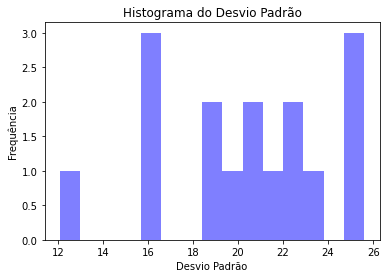

In [65]:
# Definir número de bins
num_bins = 15

# Plotar histograma
n, bins, patches = plt.hist(std_df2, num_bins, facecolor='blue', alpha=0.5)

# Adicionar rótulos e título
plt.xlabel('Desvio Padrão')
plt.ylabel('Frequência')
plt.title('Histograma do Desvio Padrão')

# Exibir plot
plt.show()

## Histograma de cada coluna ##

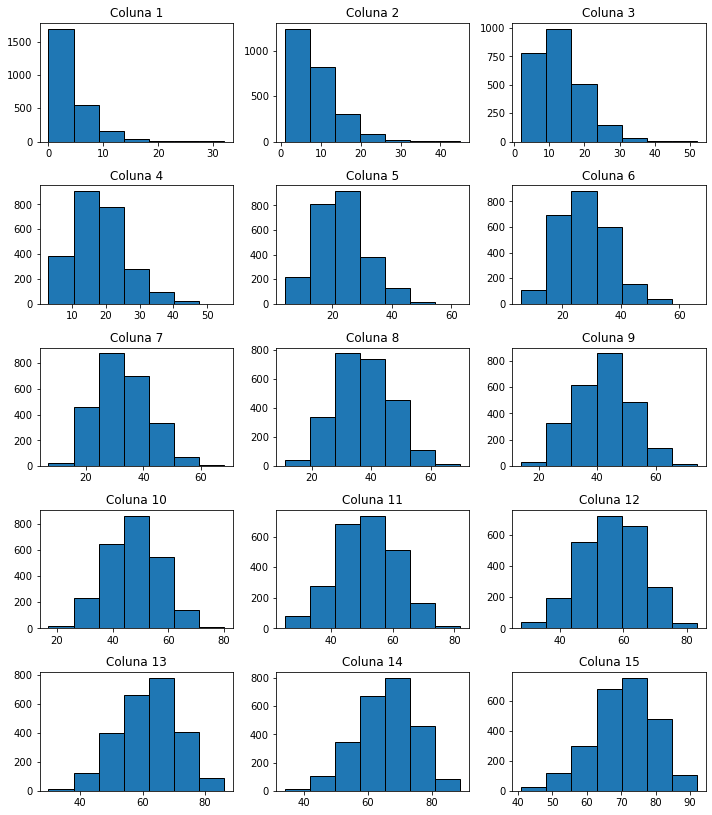

In [66]:
# Define o tamanho da figura
fig = plt.figure(figsize=(10, 45))

# Itera sobre as colunas de 1 a 15
for col in range(1, 16):
    # Seleciona os valores da coluna atual
    data = df.iloc[:, col].values
    
    # Cria um subplot na grade 20x3
    ax = fig.add_subplot(20, 3, col)
    
    # Cria um histograma com 10 bins e exibe o título da coluna
    ax.hist(data, bins=7, edgecolor='black')
    ax.set_title(f"Coluna {col}")
    
# Exibe a figura
plt.tight_layout()
plt.show()

## Analise de Números Compostos - Todos os Jogos ##

In [67]:
# Criando uma lista com os números compostos de 1 a 25
numeros_compostos = [4, 6, 8, 9, 10, 12, 14, 15, 16, 18,
                     20, 21, 22, 24, 25, 26, 27, 28, 30,
                     32, 33, 34, 35, 36, 38, 39, 40, 42,
                     44, 45, 46, 48, 49, 50, 51, 52, 54,
                     55, 56, 57, 58, 60, 62, 63, 64, 65,
                     66, 68, 69, 70, 72, 74, 75, 76, 77,
                     78, 80, 81, 82, 84, 85, 86, 87, 88,
                     90, 91, 92, 93, 94, 95, 96, 98, 99, 100]

# Criando uma nova coluna no dataframe df que contenha apenas os números de Lucas em cada linha
df['numeros_composto'] = df.iloc[:, 1:21].apply(lambda row: [x for x in row.values if x in numeros_compostos], axis=1)

In [68]:
df.head(1)

,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15,bola 16,bola 17,bola 18,bola 19,bola 20,pares,impares,Quant_Primos,Primos,Fibonacci,count_by_line,numeros_composto
Concurso,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2471,22/05/2023,0,3,5,14,25,26,35,37,38,39,51,65,69,73,75,77,79,84,90,98,7,13,5,"[3, 5, 37, 73, 79]",3,"{1: 3, 2: 1, 3: 2, 4: 4, 5: 0, 6: 1, 7: 2, 8: ...","[14, 25, 26, 35, 38, 39, 51, 65, 69, 75, 77, 8..."


## Analise de contagem de frequência de Números Composto - Todos os Jogos ##

In [70]:
# Conta o número de elementos em cada linha de "numeros_composto"
numeros_count = df['numeros_composto'].apply(len)

# Conta a frequência de cada número de elementos e armazena em um dicionário
freq = numeros_count.value_counts().to_dict()

# Imprime a frequência de cada número de elementos
for i in sorted(freq.keys()):
    print(f"{i} números: {freq[i]} vezes")

8 números: 2 vezes
9 números: 11 vezes
10 números: 17 vezes
11 números: 93 vezes
12 números: 216 vezes
13 números: 336 vezes
14 números: 529 vezes
15 números: 509 vezes
16 números: 409 vezes
17 números: 234 vezes
18 números: 93 vezes
19 números: 20 vezes
20 números: 2 vezes


## Analise de Números Perrin - Todos os Jogos ##

In [71]:
# Criando uma lista com os Números Perrin de 0 a 100
numeros_perrin = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31,
                37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79,
                83, 89, 97]

# Criando uma nova coluna no dataframe df que contenha apenas os números de Perrin em cada linha
df['numeros_perrin'] = df.iloc[:, 1:21].apply(lambda row: [x for x in row.values if x in numeros_perrin], axis=1)

In [72]:
df.head(1)

,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15,bola 16,bola 17,bola 18,bola 19,bola 20,pares,impares,Quant_Primos,Primos,Fibonacci,count_by_line,numeros_composto,numeros_perrin
Concurso,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2471,22/05/2023,0,3,5,14,25,26,35,37,38,39,51,65,69,73,75,77,79,84,90,98,7,13,5,"[3, 5, 37, 73, 79]",3,"{1: 3, 2: 1, 3: 2, 4: 4, 5: 0, 6: 1, 7: 2, 8: ...","[14, 25, 26, 35, 38, 39, 51, 65, 69, 75, 77, 8...","[3, 5, 37, 73, 79]"


## Analise de contagem de frequência de Números Perrin - Todos os Jogos ##

In [74]:
# Conta o número de elementos em cada linha de "numeros_perrin"
numeros_count = df['numeros_perrin'].apply(len)

# Conta a frequência de cada número de elementos e armazena em um dicionário
freq = numeros_count.value_counts().to_dict()

# Imprime a frequência de cada número de elementos
for i in sorted(freq.keys()):
    print(f"{i} números: {freq[i]} vezes")

0 números: 3 vezes
1 números: 33 vezes
2 números: 140 vezes
3 números: 292 vezes
4 números: 474 vezes
5 números: 551 vezes
6 números: 481 vezes
7 números: 270 vezes
8 números: 173 vezes
9 números: 39 vezes
10 números: 10 vezes
11 números: 5 vezes


## Analise de Números de Lucas - Todos os Jogos ##

In [75]:
# Criando uma lista com os números de Lucas de 1 a 16
lucas_numbers = [2, 1, 3, 4, 7, 11, 18, 29, 47, 76]

# Criando uma nova coluna no dataframe df que contenha apenas os números de Lucas em cada linha
df['numeros_lucas'] = df.iloc[:, 1:21].apply(lambda row: [x for x in row.values if x in lucas_numbers], axis=1)

In [76]:
df.head(1)

,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,bola 7,bola 8,bola 9,bola 10,bola 11,bola 12,bola 13,bola 14,bola 15,bola 16,bola 17,bola 18,bola 19,bola 20,pares,impares,Quant_Primos,Primos,Fibonacci,count_by_line,numeros_composto,numeros_perrin,numeros_lucas
Concurso,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2471,22/05/2023,0,3,5,14,25,26,35,37,38,39,51,65,69,73,75,77,79,84,90,98,7,13,5,"[3, 5, 37, 73, 79]",3,"{1: 3, 2: 1, 3: 2, 4: 4, 5: 0, 6: 1, 7: 2, 8: ...","[14, 25, 26, 35, 38, 39, 51, 65, 69, 75, 77, 8...","[3, 5, 37, 73, 79]",[3]


## Analise de contagem de frequência de Números de Lucas - Todos os Jogos ##

In [77]:
# Conta o número de elementos em cada linha de "numeros_lucas"
numeros_count = df['numeros_lucas'].apply(len)

# Conta a frequência de cada número de elementos e armazena em um dicionário
freq = numeros_count.value_counts().to_dict()

# Imprime a frequência de cada número de elementos
for i in sorted(freq.keys()):
    print(f"{i} números: {freq[i]} vezes")

0 números: 199 vezes
1 números: 656 vezes
2 números: 800 vezes
3 números: 524 vezes
4 números: 217 vezes
5 números: 65 vezes
6 números: 9 vezes
7 números: 1 vezes


## Gera números aleatórios ##

In [ ]:
numeros_gerados = []
num_impares = 7
num_pares = 6
num_primos = [2, 3, 5, 7, 11, 13, 17, 19, 23]
num_fibonacci = [2, 3, 5, 8, 13, 21]
num_perrin = [2, 3, 5, 7, 10, 12, 17, 22]
num_compostos = [4, 6, 8, 9, 10, 12, 14, 15, 16, 18, 20, 21, 22, 24]
num_lucas = [2, 3, 4, 7, 11, 18]

# Adiciona os números primos, Fibonacci, Perrin e Compostos
for num in num_primos + num_fibonacci + num_perrin + num_compostos:
    if num in numeros_gerados:
        continue
    numeros_gerados.append(num)

# Seleciona aleatoriamente os números restantes
while len(numeros_gerados) < 13:
    if num_impares > 0 and num_pares > 0:
        num = random.choice(range(2, 25, 2) if num_pares > num_impares else range(1, 25, 2))
        if num % 2 == 0:
            num_pares -= 1
        else:
            num_impares -= 1
    else:
        num = random.choice(range(2, 25))
    if num in numeros_gerados:
        continue
    numeros_gerados.append(num)

# Adiciona os números de Lucas
num_lucas_gerados = 0
while num_lucas_gerados < random.randint(4, 5):
    num_lucas_gerado = random.choice(num_lucas)
    if num_lucas_gerado not in numeros_gerados:
        numeros_gerados.append(num_lucas_gerado)
        num_lucas_gerados += 1

numeros_gerados.sort()
print(numeros_gerados)

-- OK -- Análise de frequência de números pares e ímpares
-- OK -- Análise de números primos
-- OK -- Análise de repetições de números
-- OK -- Análise de números mais e menos sorteados
-- OK -- Análise de sequências numéricas
-- OK -- Análise de números que aparecem em sequência
-- OK -- Análise de Jogos repetidos.
-- OK -- Análise de números de Fibonacci.
-- OK -- Contagem de números por linha da cartela
-- OK -- Contagem de Frequencia da contagem de números por linha
-- OK -- Análise de desvio padrão
-- OK -- Histograma de cada coluna
-- OK -- Analise de Números Compostos
-- OK -- Analise de Números Perrin
-- OK -- Analise de Números de Lucas